# Implementatie van Lloyds algoritme

- Auteur: Jimmy Bierenbroodspot
- Datum: 21 juni 2024
- Locatie: Hogeschool Utrecht

## Inleiding

in dit document zullen we een error-functie voor ons clusteringsmodel
implementeren en vervolgens zullen we kijken of deze functie overeenkomt met
onze verwachtingen.

In [64]:
from typing import Any
import sys
sys.path.append("../")

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

from src.algorithm.clustering import ClusteringModel

## WCSS

Voor onze error functie gaan we de iets dat bekend staat als de Within-Cluster
Sum of Squares (WCSS). Dit doen we met de volgende stappen:

1. Voor elk clustercentrum sommeer het volgende:
2. Voor elk bijbehorend datapunt per clustercentrum sommeer de Euclidische 
afstand zonder wortel erbij te betrekken.

In [65]:
def get_wcss[DataT: Any](
        data: npt.NDArray[DataT], 
        closest_centers: npt.NDArray[np.int64], 
        cluster_centers: npt.NDArray[DataT]
) -> np.float64:
    closest_center: int
    data_point: npt.NDArray[DataT]
    result: np.float64 = np.float64(0.0)

    for closest_center in range(len(cluster_centers)):
        cluster: npt.NDArray[DataT] = data[closest_centers == closest_center, :]
        for data_point in cluster:
            result += np.sum((data_point - cluster_centers[closest_center]) ** 2)

    return result

We kunnen de manier uit `eerste_demo_lloyds.ipynb` gebruiken om een aantal test
clusters te genereren. Hieronder creëren we wederom 3 clusters.

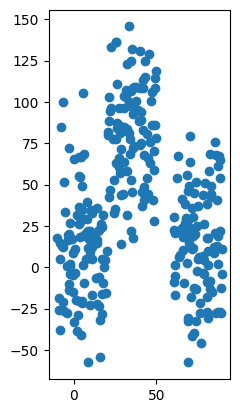

In [66]:
center_one: tuple[int, int] = (-10, 15)
center_two: tuple[int, int] = (20, 80)
center_three: tuple[int, int] = (60, 10)
distance: int = 30

demo_dataset: npt.NDArray[np.int64] = np.array([
    [
        *np.random.uniform(center_one[0], center_one[0] + distance, size=(100,)),
        *np.random.uniform(center_two[0], center_two[0] + distance, size=(100,)),
        *np.random.uniform(center_three[0], center_three[0] + distance, size=(100,)),
    ],
    [
        *np.random.normal(center_one[1], distance, size=(100,)),
        *np.random.normal(center_two[1], distance, size=(100,)),
        *np.random.normal(center_three[1], distance, size=(100,)),
    ],
]).T

plt.scatter(x=demo_dataset[:,0], y=demo_dataset[:,1]) # type: ignore
plt.gca().set_aspect("equal", adjustable="box")

plt.show() # type: ignore

Voor de elleboog-methode moeten we het model voor meerdere aantallen aan 
clustercentra uitvoeren en de WCSS noteren. 

In [67]:
run_count: int = 9

model_score: npt.NDArray[np.float64] = np.zeros((run_count,))

for i in range(1, run_count):
    model: ClusteringModel[np.int64] = ClusteringModel(demo_dataset, i + 1, "lloyds")
    model.train(demo_dataset)
    model_score[i] = get_wcss(demo_dataset, model.closest_centers, model.cluster_centers)    

print(model_score)

[     0.         449710.84702187 243885.24708602 191577.67757161
 136742.59329641 101996.30846242  83736.33955656  73489.03111788
  73999.09547376]


Uiteindelijk zetten we dit in een grafiek met het aantal clusters op de x-as en
de WCSS op de y-as.

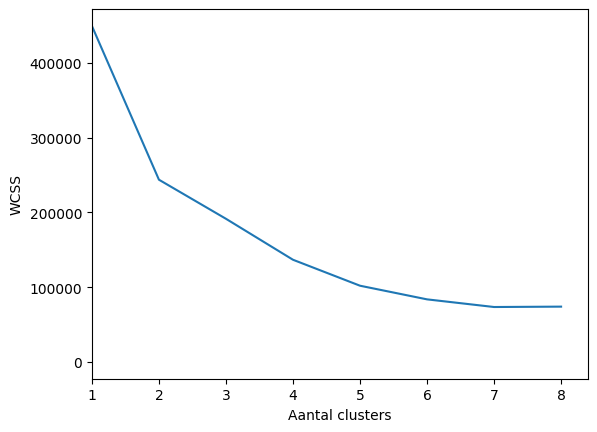

In [68]:
plt.plot(model_score)
plt.xlim(left=1)
plt.xlabel("Aantal clusters")
plt.ylabel("WCSS")
plt.title("")
plt.show()

We zien bovenaan de y-as dat de waarde van WCSS best hoog kan zijn. Dit is omdat
het kwadraat van alle afstanden in de dataset berekend wordt, dit zal oplopen
naarmate de dataset groter wordt. Dit kan onder andere door de dataset te
standaardiseren naar waardes tussen 0 en 1 maar dit is niet per se belangrijk.

Nu kunnen we de functie implementeren in het model. Om een idee te krijgen wat
de clusters achter elke score zitten kunnen we voor elke keer dat we het model
draaien de clusters en clustercentra tonen.

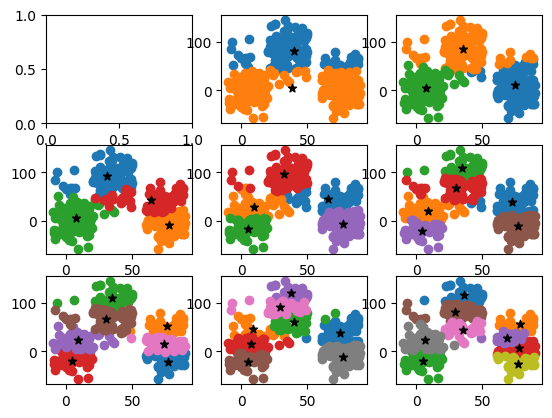

In [69]:
fig: Figure
ax: list[list[Axes]]

fig, ax = plt.subplots(3, 3)

run_count: int = 9

model_score: npt.NDArray[np.float64] = np.zeros((run_count,))

for i in range(1, run_count):
    model: ClusteringModel[np.int64] = ClusteringModel(demo_dataset, i + 1, "lloyds")
    model.train(demo_dataset)
    model_score[i] = model.error

    plot_col, plot_row = i % 3, i // 3
    for center in range(model.num_clusters):
        ax[plot_row][plot_col].scatter(*demo_dataset[model.closest_centers == center].T)

    ax[plot_row][plot_col].scatter(*model.cluster_centers.T, color="black", marker="*")

Erachter komen wat de juiste aantal clusters voor onze dataset is, is geen
makkelijke taak. We zouden dit op de grafiek hieronder moeten kunnen zien, 
echter is het niet helemaal duidelijk waar de "elleboog" precies zit. Onze 
aantal clusters zou in dit geval ergens rond de 3 kunnen zitten maar het is niet
glashelder.

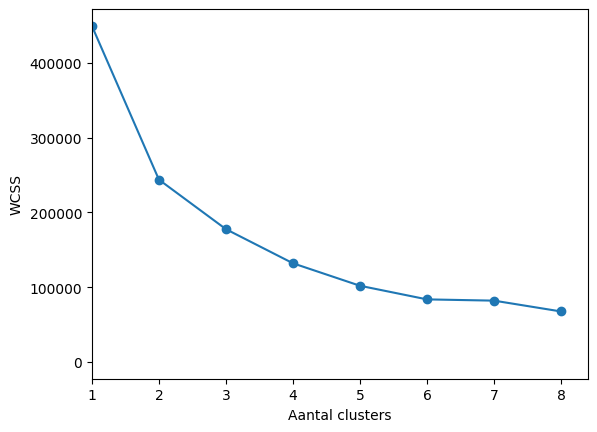

In [81]:
plt.plot(model_score)
plt.scatter(np.arange(stop=9, start=0), model_score)
plt.xlim(left=1)
plt.xlabel("Aantal clusters")
plt.ylabel("WCSS")
plt.show()